**Models Training on Transformed Edge_IIoTset Dataset**

In [1]:
pip install Keras-Applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 6.4 MB/s eta 0:00:00


In [2]:
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.efficientnet_v2 import EfficientNetV2L
import keras.callbacks as kcallbacks
import keras
#from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import img_to_array
import math
import random
from keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

**Generate Training and Test Images**

In [5]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=32	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/train_A',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test_A',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 5369 images belonging to 15 classes.
Found 1342 images belonging to 15 classes.


**Model 1: Generic CNN model**

Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 0.7626 - accuracy: 0.7752
Epoch 1: val_accuracy improved from -inf to 0.86736, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/generic_cnn.h5
168/168 [==============================] - 2460s 14s/step - loss: 0.7626 - accuracy: 0.7752 - val_loss: 0.4109 - val_accuracy: 0.8674
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.2443 - accuracy: 0.9119
Epoch 2: val_accuracy improved from 0.86736 to 0.91952, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/generic_cnn.h5
168/168 [==============================] - 38s 225ms/step - loss: 0.2443 - accuracy: 0.9119 - val_loss: 0.1904 - val_accuracy: 0.9195
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.1480 - accuracy: 0.9454
Epoch 3: val_accuracy improved from 0.91952 to 0.96796, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/gen

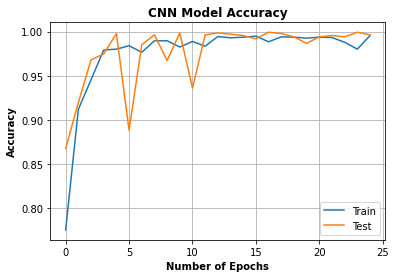

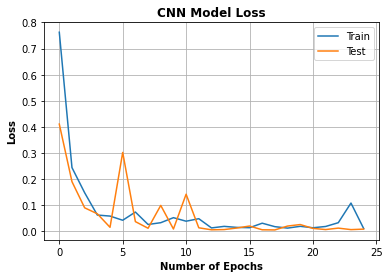

In [6]:
#Tuned Hyperparameters for Generic CNN model by Genetic Algorithm
# f1,f2,f3 : Filter Sizes : 32, 128, 256
# k : Kernel_size : 5
# a1, a2: Activation functions : relu, selu
# d1: Drop out : 0.1
# op: Optimizer : adam
# ep: Number of epochs : 17

input_shape=INPUT_SIZE
num_class=15
epochs=25                #Training is executed for 25 epochs for the better visualization of results 
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/generic_cnn.h5'

#Define CNN Model
model = Sequential()
model.add(Conv2D(32,(5,5),strides=(1,1),input_shape=input_shape,padding='same',activation='relu'))
model.add(Conv2D(32,(5,5),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(5,5),strides=(1,1),padding='same',activation='selu'))
model.add(Conv2D(128,(5,5),strides=(1,1),padding='same',activation='selu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='selu'))
model.add(Dropout(rate=0.1))
model.add(Dense(num_class,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()


**Model 2: Xception**

83683744/83683744 [==============================] - 4s 0us/step
Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 0.1263 - accuracy: 0.9646
Epoch 1: val_accuracy improved from -inf to 0.98808, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/xception.h5
168/168 [==============================] - 44s 240ms/step - loss: 0.1263 - accuracy: 0.9646 - val_loss: 0.0371 - val_accuracy: 0.9881
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9922
Epoch 2: val_accuracy did not improve from 0.98808
168/168 [==============================] - 30s 177ms/step - loss: 0.0234 - accuracy: 0.9922 - val_loss: 0.0318 - val_accuracy: 0.9866
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9965
Epoch 3: val_accuracy improved from 0.98808 to 0.99329, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/xception.h5
168/168 [======================

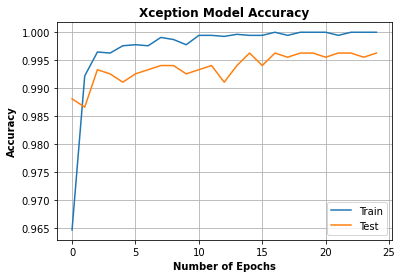

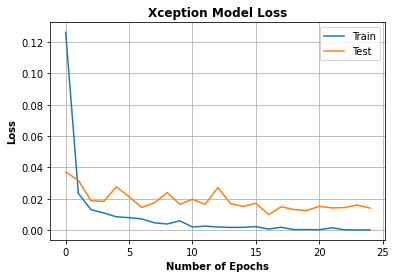

In [7]:
#Tuned Hyperparameters for Xception model by Genetic Algorithm
# frozen: Frozen Layers : 128
# f1: Number of units in dense layer: 128
# a1: Activation function : selu
# d1: Drop out : 0.2
# op: Optimizer : adamax
# ep: Number of epochs : 14


input_shape=INPUT_SIZE
num_class=15
epochs=25              #Training is executed for 25 epochs for the better visualization of results
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/xception.h5'

#Define Xception Model
model_fine_tune = Xception(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:128]:
    layer.trainable = False
for layer in model_fine_tune.layers[128:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=128,activation='selu')(model)
model=Dropout(0.2)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='xception')
opt = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Xception Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()


**Model 3: VGG16**

Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 0.6106 - accuracy: 0.8307
Epoch 1: val_accuracy improved from -inf to 0.89642, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/VGG16.h5
168/168 [==============================] - 56s 327ms/step - loss: 0.6106 - accuracy: 0.8307 - val_loss: 0.2717 - val_accuracy: 0.8964
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.2660 - accuracy: 0.9234
Epoch 2: val_accuracy improved from 0.89642 to 0.96125, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/VGG16.h5
168/168 [==============================] - 55s 326ms/step - loss: 0.2660 - accuracy: 0.9234 - val_loss: 0.1189 - val_accuracy: 0.9613
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.1316 - accuracy: 0.9557
Epoch 3: val_accuracy improved from 0.96125 to 0.97541, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/VGG16.h5
168/16

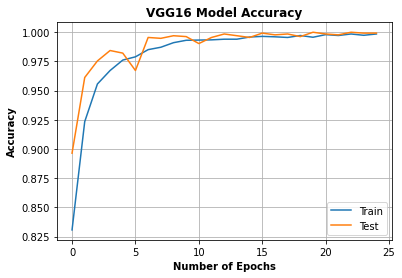

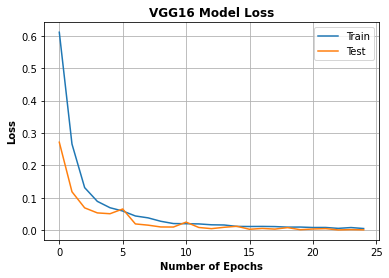

In [11]:
#Tuned Hyperparameters for VGG16 model by Genetic Algorithm
# frozen: Frozen Layers : 8
# f1: Number of units in dense layer: 128
# a1: Activation function : elu
# d1: Drop out : 0.5
# op: Optimizer : adagrad
# ep: Number of epochs : 11

input_shape=INPUT_SIZE
num_class=15
epochs=25        #Training is executed for 25 epochs for the better visualization of results
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/VGG16.h5'

#Define VGG16 Model
model_fine_tune = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:8]:	
    layer.trainable = False
for layer in model_fine_tune.layers[8:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output) 
model=Dense(units=128,activation='elu')(model)
model=Dropout(0.5)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='vgg')
opt = keras.optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()


**Model 4: VGG19**

80134624/80134624 [==============================] - 4s 0us/step
Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 1.5924 - accuracy: 0.7551
Epoch 1: val_accuracy improved from -inf to 0.85768, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/VGG19.h5
168/168 [==============================] - 65s 379ms/step - loss: 1.5924 - accuracy: 0.7551 - val_loss: 0.5080 - val_accuracy: 0.8577
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.3729 - accuracy: 0.8715
Epoch 2: val_accuracy improved from 0.85768 to 0.90537, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/VGG19.h5
168/168 [==============================] - 61s 363ms/step - loss: 0.3729 - accuracy: 0.8715 - val_loss: 0.2674 - val_accuracy: 0.9054
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.2914 - accuracy: 0.8981
Epoch 3: val_accuracy improved from 0.90537 to 0.92623, saving model to /content/drive/M

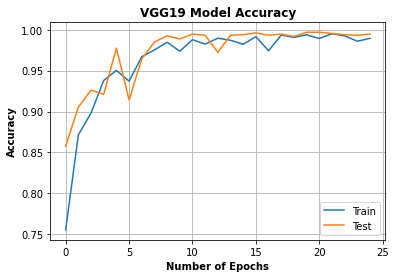

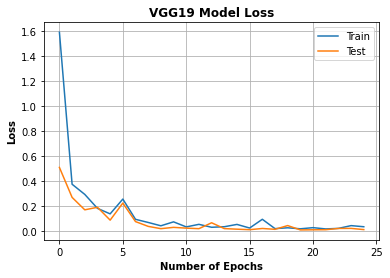

In [12]:
#Tuned Hyperparameters for VGG19 model by Genetic Algorithm
# frozen: Frozen Layers : 10
# f1: Number of units in dense layer: 128
# a1: Activation function : relu
# d1: Drop out : 0.3
# op: Optimizer : adamax
# ep: Number of epochs : 16

input_shape=INPUT_SIZE
num_class=15
epochs=25        #Training is executed for 25 epochs for the better visualization of results
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/VGG19.h5'

#Define VGG19 Model
model_fine_tune = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:10]:	
    layer.trainable = False
for layer in model_fine_tune.layers[10:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model = Dense(units=128,activation='relu')(model)
model = Dropout(0.3)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='vgg')
opt = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
   
#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG19 Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG19 Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()


**Model 5: Inception**

87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 0.6357 - accuracy: 0.8266
Epoch 1: val_accuracy improved from -inf to 0.80551, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/inception.h5
168/168 [==============================] - 58s 299ms/step - loss: 0.6357 - accuracy: 0.8266 - val_loss: 0.5549 - val_accuracy: 0.8055
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.2459 - accuracy: 0.9352
Epoch 2: val_accuracy improved from 0.80551 to 0.97615, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/inception.h5
168/168 [==============================] - 41s 244ms/step - loss: 0.2459 - accuracy: 0.9352 - val_loss: 0.1177 - val_accuracy: 0.9762
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.1208 - accuracy: 0.9696
Epoch 3: val_accuracy improved from 0.97615 to 0.98733, saving model to /content

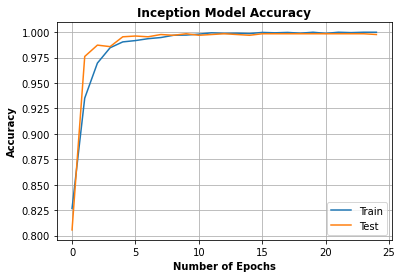

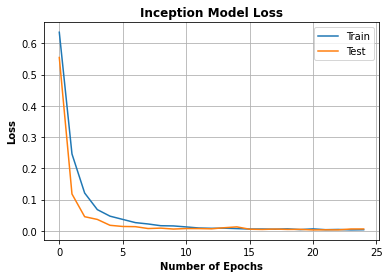

In [13]:
#Tuned Hyperparameters for Inception model by Genetic Algorithm
# frozen: Frozen Layers : 45
# f1: Number of units in dense layer: 128
# a1: Activation function : relu
# d1: Drop out : 0.5
# op: Optimizer : adagrad
# ep: Number of epochs : 19

input_shape=INPUT_SIZE
num_class=15
epochs=25           #Training is executed for 25 epochs for the better visualization of results
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/inception.h5'

#Define Inception Model
model_fine_tune = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:45]:
    layer.trainable = False
for layer in model_fine_tune.layers[45:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=256,activation='relu')(model)
model=Dropout(0.5)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='resnet')
opt = keras.optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Inception Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Inception Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()

**Model 6: InceptionResnet V2**

219055592/219055592 [==============================] - 10s 0us/step
Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 0.1703 - accuracy: 0.9475
Epoch 1: val_accuracy improved from -inf to 0.97988, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/inceptionresnetv2.h5
168/168 [==============================] - 99s 509ms/step - loss: 0.1703 - accuracy: 0.9475 - val_loss: 0.0482 - val_accuracy: 0.9799
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.0380 - accuracy: 0.9860
Epoch 2: val_accuracy improved from 0.97988 to 0.98733, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/inceptionresnetv2.h5
168/168 [==============================] - 71s 423ms/step - loss: 0.0380 - accuracy: 0.9860 - val_loss: 0.0283 - val_accuracy: 0.9873
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9931
Epoch 3: val_accuracy improved from 0.98733 to 0.99627, savin

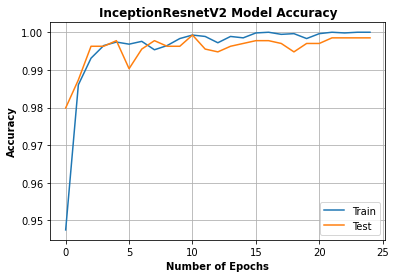

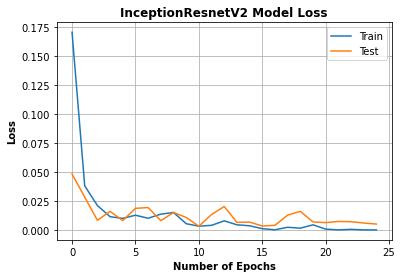

In [14]:
#Tuned Hyperparameters for InceptionResnet model by Genetic Algorithm
# frozen: Frozen Layers : 451
# f1: Number of units in dense layer: 128
# a1: Activation function : selu
# d1: Drop out : 0.3
# op: Optimizer : adamax
# ep: Number of epochs : 12

input_shape=INPUT_SIZE
num_class=15
epochs=25          #Training is executed for 25 epochs for the better visualization of results
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/inceptionresnetv2.h5'

#Define Inception Resnet V2 Model
model_fine_tune = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:451]:
    layer.trainable = False
for layer in model_fine_tune.layers[451:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=128,activation='selu')(model)
model=Dropout(0.3)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='resnet')
opt = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('InceptionResnetV2 Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('InceptionResnetV2 Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()


**Model 7: EfficientNetB7**

258076736/258076736 [==============================] - 11s 0us/step
Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 0.4053 - accuracy: 0.8892
Epoch 1: val_accuracy improved from -inf to 0.91207, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/efficientnetb7.h5
168/168 [==============================] - 219s 1s/step - loss: 0.4053 - accuracy: 0.8892 - val_loss: 0.2487 - val_accuracy: 0.9121
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.1795 - accuracy: 0.9370
Epoch 2: val_accuracy improved from 0.91207 to 0.95455, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/efficientnetb7.h5
168/168 [==============================] - 171s 1s/step - loss: 0.1795 - accuracy: 0.9370 - val_loss: 0.0878 - val_accuracy: 0.9545
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.1518 - accuracy: 0.9423
Epoch 3: val_accuracy did not improve from 0.95455
168/168 [===========

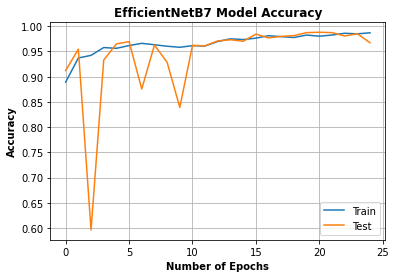

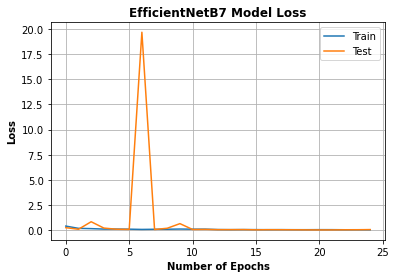

In [15]:
#Tuned Hyperparameters for EfficientNetB7 model by Genetic Algorithm
# frozen: Frozen Layers : 288
# f1: Number of units in dense layer: 128
# a1: Activation function : selu
# d1: Drop out : 0.4
# op: Optimizer : adam
# ep: Number of epochs : 15

input_shape=INPUT_SIZE
num_class=15
epochs=25      #Training is executed for 25 epochs for the better visualization of results
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/efficientnetb7.h5'

#Define EfficientNetB7 Model
model_fine_tune = EfficientNetB7(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:288]:
    layer.trainable = False
for layer in model_fine_tune.layers[288:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=128,activation='selu')(model)
model=Dropout(0.4)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='efficientnetb7')
opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('EfficientNetB7 Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('EfficientNetB7 Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()


**Model 8: EfficientNetV2L**

473176280/473176280 [==============================] - 21s 0us/step
Epoch 1/25
168/168 [==============================] - ETA: 0s - loss: 0.4405 - accuracy: 0.8713
Epoch 1: val_accuracy improved from -inf to 0.92399, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/efficientnetv2l.h5
168/168 [==============================] - 239s 1s/step - loss: 0.4405 - accuracy: 0.8713 - val_loss: 0.2394 - val_accuracy: 0.9240
Epoch 2/25
168/168 [==============================] - ETA: 0s - loss: 0.1970 - accuracy: 0.9398
Epoch 2: val_accuracy improved from 0.92399 to 0.94709, saving model to /content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/efficientnetv2l.h5
168/168 [==============================] - 208s 1s/step - loss: 0.1970 - accuracy: 0.9398 - val_loss: 0.1205 - val_accuracy: 0.9471
Epoch 3/25
168/168 [==============================] - ETA: 0s - loss: 0.1317 - accuracy: 0.9573
Epoch 3: val_accuracy improved from 0.94709 to 0.98808, saving model 

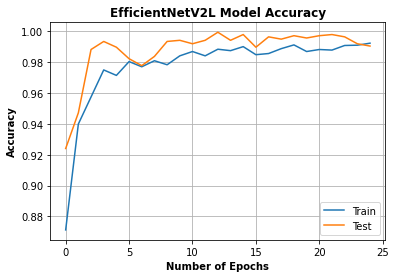

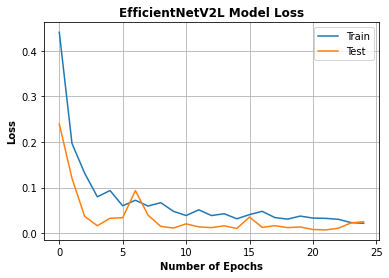

In [16]:
#Tuned Hyperparameters for  EfficientNetV2L model by Genetic Algorithm
# frozen: Frozen Layers : 316
# f1: Number of units in dense layer: 128
# a1: Activation function : selu
# d1: Drop out : 0.5
# op: Optimizer : adam
# ep: Number of epochs : 19

input_shape=INPUT_SIZE
num_class=15
epochs=25          #Training is executed for 25 epochs for the better visualization of results
savepath='/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/efficientnetv2l.h5'

#Define EfficientNetB7 Model
model_fine_tune = EfficientNetV2L(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in model_fine_tune.layers[:316]:
    layer.trainable = False
for layer in model_fine_tune.layers[316:]:
    layer.trainable = True
model = GlobalAveragePooling2D()(model_fine_tune.output)
model=Dense(units=128,activation='selu')(model)
model=Dropout(0.5)(model)
model = Dense(num_class, activation='softmax')(model)
model = Model(model_fine_tune.input, model, name='efficientnetv2-l')
opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model Training
saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history=model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=validation_generator,
                  validation_steps=len(validation_generator), callbacks=[saveBestModel])

#Plot Training and Testing Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('EfficientNetV2L Model Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='lower right')
plt.grid()
plt.show()

#Plot Training and Testing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('EfficientNetV2L Model Loss', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=10, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=10, fontweight='bold')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()

**Predictions with pre-trained Models**

In [17]:
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict

In [18]:
#Generate Images from Test Set
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=32

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test_A',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 1342 images belonging to 15 classes.


In [19]:
#generate labels indicating attack (1) or normal (0)
label=validation_generator.class_indices
label={v: k for k, v in label.items()}

In [20]:
print(label)

{0: 'Backdoor', 1: 'DDoS_HTTP', 2: 'DDoS_ICMP', 3: 'DDoS_TCP', 4: 'DDoS_UDP', 5: 'Fingerprinting', 6: 'MITM', 7: 'Normal', 8: 'Password', 9: 'Port_Scanning', 10: 'Ransomware', 11: 'SQL_injection', 12: 'Uploading', 13: 'Vulnerability_scanner', 14: 'XSS'}


In [21]:
#Read Images from Test Folders
rootdir = '/content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test_A'
true = []          #True Labels
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        true.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))
        
print(true[0],test_images[0])

Normal /content/drive/MyDrive/Transfer_IDS_IIoT/Datasets/test_A/Normal/571.png


**Load 8 trained Models**

In [22]:
#load model 1: Generic CNN Model
cnn_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/generic_cnn.h5')

In [23]:
#load model 2: Xception
xception_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/xception.h5')

In [52]:
#load model 3: VGG16
vgg_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/VGG16.h5')

In [25]:
#load model 4: VGG19
vgg19_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/VGG19.h5')

In [26]:
#load model 5: inception
incep_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/inception.h5')

In [27]:
#load model 6: InceptionResnetV2
incepresnetv2_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/inceptionresnetv2.h5')

In [28]:
#load model 7: EfficientB7
efficientb7_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/efficientnetb7.h5')

In [29]:
#load model 8: EfficientNetV2L
efficientnetv2l_model=load_model('/content/drive/MyDrive/Transfer_IDS_IIoT/Optimized_Trained_Models/efficientnetv2l.h5')

In [30]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import seaborn as sn
import pandas as pd
import scikitplot as skplt

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

**1. Predictions using Generic CNN**

In [33]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
    
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    cnn_model_prediction=cnn_model.predict(this_img) #Input image processing using trained master model
    #Results generation by Generic CNN
    prob=cnn_model_prediction[0,np.argmax(cnn_model_prediction,axis=1)[0]]
    res=label[np.argmax(cnn_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 15ms/step
CPU times: user 1min 8s, sys: 3.09 s, total: 1min 11s
Wall time: 1min 31s


CNN Accuracy: 0.9992548435171386
Precision: 0.9993479880774963
Recall: 0.9992548435171386
F1 Score: 0.999268391816827
Cohen Kappa Score: 0.9985075722359504


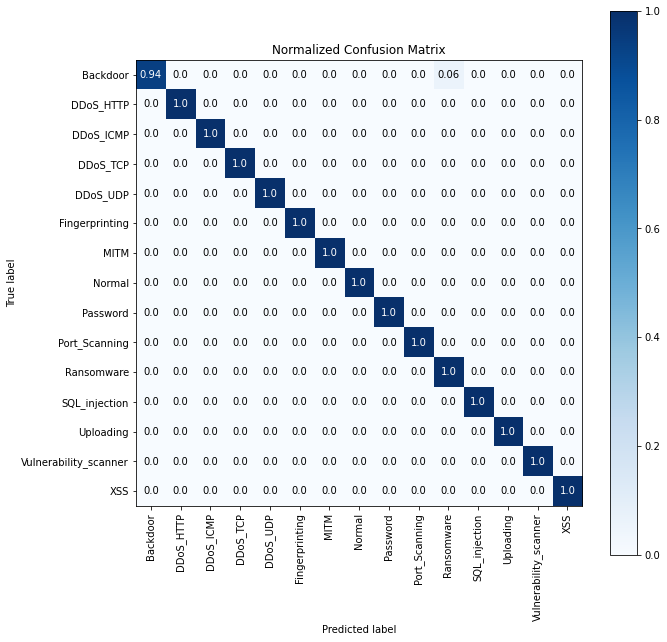

                       precision    recall  f1-score   support

             Backdoor     1.0000    0.9412    0.9697        17
            DDoS_HTTP     1.0000    1.0000    1.0000        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     1.0000    1.0000    1.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     1.0000    1.0000    1.0000        42
        Port_Scanning     1.0000    1.0000    1.0000        20
           Ransomware     0.8750    1.0000    0.9333         7
        SQL_injection     1.0000    1.0000    1.0000        39
            Uploading     1.0000    1.0000    1.0000        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     1.0000    1.0000    1.0000  

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('CNN Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**2. Predictions using Xception**

In [35]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    xception_model_prediction=xception_model.predict(this_img) #Input image processing using trained master model
    #Results generation by Xception
    prob=xception_model_prediction[0,np.argmax(xception_model_prediction,axis=1)[0]]
    res=label[np.argmax(xception_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 21ms/step
CPU times: user 1min 17s, sys: 2.79 s, total: 1min 20s
Wall time: 1min 35s


Xception Accuracy: 0.996274217585693
Precision: 0.9970410076438634
Recall: 0.996274217585693
F1 Score: 0.9963699610145016
Cohen Kappa Score: 0.9925382428952062


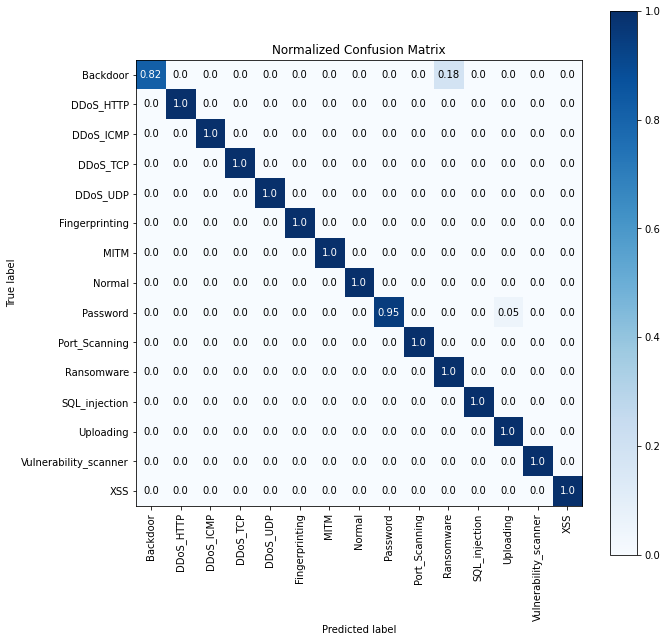

                       precision    recall  f1-score   support

             Backdoor     1.0000    0.8235    0.9032        17
            DDoS_HTTP     1.0000    1.0000    1.0000        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     1.0000    1.0000    1.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     1.0000    0.9524    0.9756        42
        Port_Scanning     1.0000    1.0000    1.0000        20
           Ransomware     0.7000    1.0000    0.8235         7
        SQL_injection     1.0000    1.0000    1.0000        39
            Uploading     0.9355    1.0000    0.9667        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     1.0000    1.0000    1.0000  

In [36]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('Xception Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**3. Predictions using VGG16**

In [53]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    vgg_model_prediction=vgg_model.predict(this_img) #Input image processing using trained master model
    #Results generation by VGG16
    prob=vgg_model_prediction[0,np.argmax(vgg_model_prediction,axis=1)[0]]
    res=label[np.argmax(vgg_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 18ms/step
CPU times: user 1min 10s, sys: 2.87 s, total: 1min 12s
Wall time: 1min 22s


VGG16 Accuracy: 0.9955290611028316
Precision: 0.9956473399096349
Recall: 0.9955290611028316
F1 Score: 0.9954750167864923
Cohen Kappa Score: 0.9910453238730198


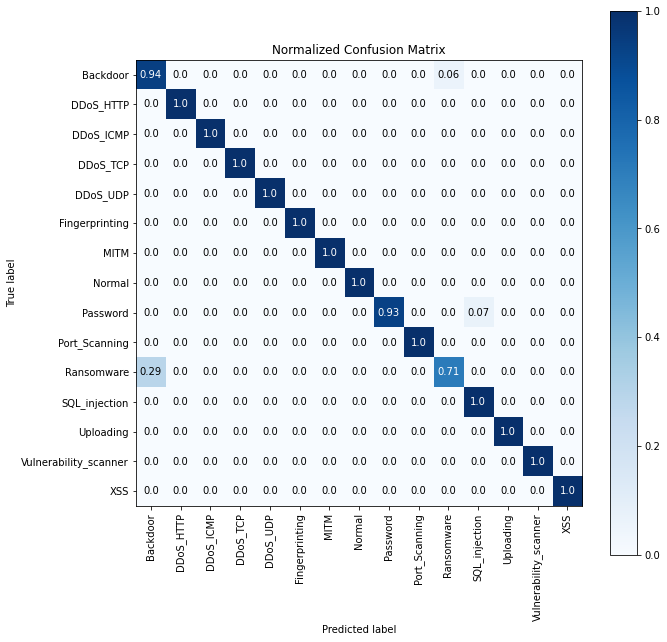

                       precision    recall  f1-score   support

             Backdoor     0.8889    0.9412    0.9143        17
            DDoS_HTTP     1.0000    1.0000    1.0000        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     1.0000    1.0000    1.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     1.0000    0.9286    0.9630        42
        Port_Scanning     1.0000    1.0000    1.0000        20
           Ransomware     0.8333    0.7143    0.7692         7
        SQL_injection     0.9286    1.0000    0.9630        39
            Uploading     1.0000    1.0000    1.0000        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     1.0000    1.0000    1.0000  

In [54]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('VGG16 Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**4. Predictions using VGG19**

In [39]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    vgg19_model_prediction=vgg19_model.predict(this_img) #Input image processing using trained master model
    #Results generation by Generic VGG19
    prob=vgg19_model_prediction[0,np.argmax(vgg19_model_prediction,axis=1)[0]]
    res=label[np.argmax(vgg19_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 17ms/step
CPU times: user 1min 14s, sys: 2.84 s, total: 1min 17s
Wall time: 1min 29s


VGG19 Accuracy: 0.9970193740685543
Precision: 0.9975871123412108
Recall: 0.9970193740685543
F1 Score: 0.9965801239312888
Cohen Kappa Score: 0.9940299569818808


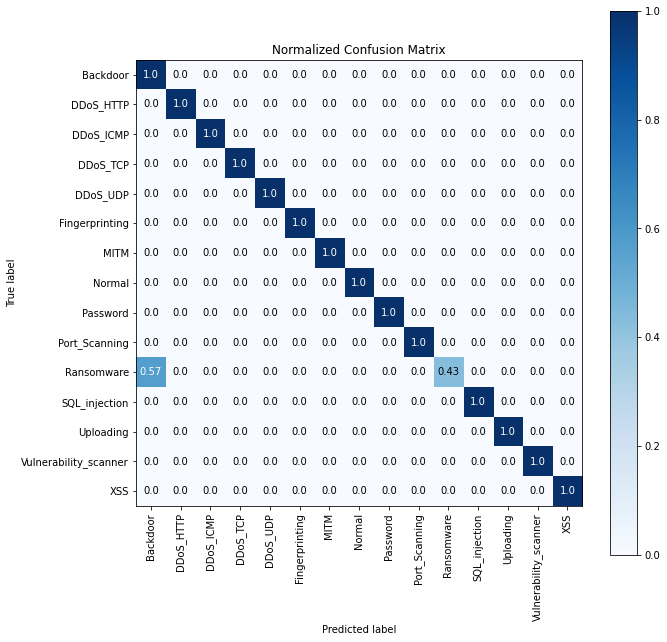

                       precision    recall  f1-score   support

             Backdoor     0.8095    1.0000    0.8947        17
            DDoS_HTTP     1.0000    1.0000    1.0000        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     1.0000    1.0000    1.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     1.0000    1.0000    1.0000        42
        Port_Scanning     1.0000    1.0000    1.0000        20
           Ransomware     1.0000    0.4286    0.6000         7
        SQL_injection     1.0000    1.0000    1.0000        39
            Uploading     1.0000    1.0000    1.0000        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     1.0000    1.0000    1.0000  

In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('VGG19 Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**5. Predictions using Inception**

In [41]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    incep_model_prediction=incep_model.predict(this_img) #Input image processing using trained master model
    #Results generation by Inception
    prob=incep_model_prediction[0,np.argmax(incep_model_prediction,axis=1)[0]]
    res=label[np.argmax(incep_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 25ms/step
CPU times: user 1min 24s, sys: 2.74 s, total: 1min 26s
Wall time: 1min 38s


Inception Accuracy: 0.9985096870342772
Precision: 0.9986665620833007
Recall: 0.9985096870342772
F1 Score: 0.9984268918695148
Cohen Kappa Score: 0.9970150448855396


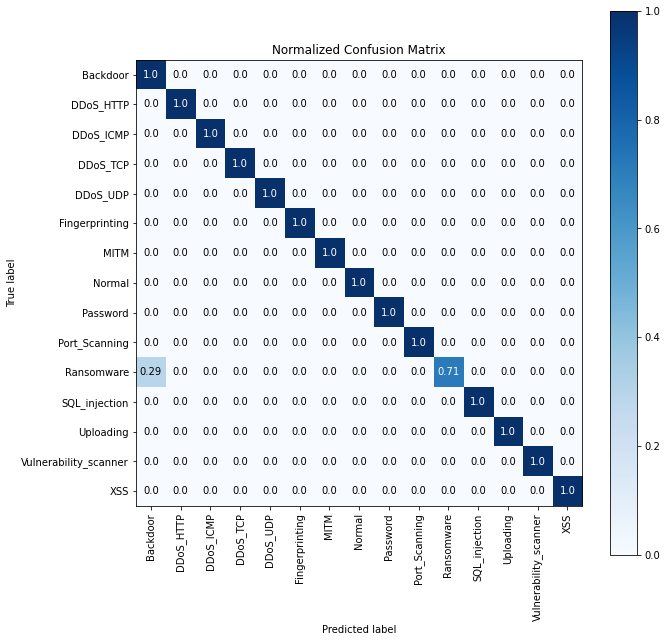

                       precision    recall  f1-score   support

             Backdoor     0.8947    1.0000    0.9444        17
            DDoS_HTTP     1.0000    1.0000    1.0000        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     1.0000    1.0000    1.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     1.0000    1.0000    1.0000        42
        Port_Scanning     1.0000    1.0000    1.0000        20
           Ransomware     1.0000    0.7143    0.8333         7
        SQL_injection     1.0000    1.0000    1.0000        39
            Uploading     1.0000    1.0000    1.0000        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     1.0000    1.0000    1.0000  

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('Inception Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**6. Predictions using InceptionresnetV2**

In [43]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    incepresnetv2_model_prediction=incepresnetv2_model.predict(this_img) #Input image processing using trained master model
    #Results generation by InceptionResnetV2
    prob=incepresnetv2_model_prediction[0,np.argmax(incepresnetv2_model_prediction,axis=1)[0]]
    res=label[np.argmax(incepresnetv2_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 34ms/step
CPU times: user 2min 1s, sys: 2.77 s, total: 2min 3s
Wall time: 2min 23s


InseptionResnetV2 Accuracy: 0.9992548435171386
Precision: 0.9993479880774963
Recall: 0.9992548435171386
F1 Score: 0.999268391816827
Cohen Kappa Score: 0.9985075722359504


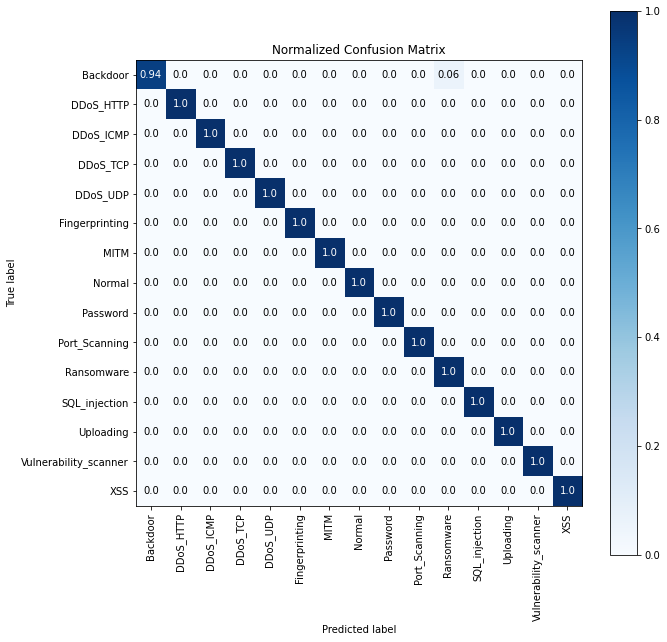

                       precision    recall  f1-score   support

             Backdoor     1.0000    0.9412    0.9697        17
            DDoS_HTTP     1.0000    1.0000    1.0000        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     1.0000    1.0000    1.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     1.0000    1.0000    1.0000        42
        Port_Scanning     1.0000    1.0000    1.0000        20
           Ransomware     0.8750    1.0000    0.9333         7
        SQL_injection     1.0000    1.0000    1.0000        39
            Uploading     1.0000    1.0000    1.0000        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     1.0000    1.0000    1.0000  

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('InseptionResnetV2 Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**7. Predictions using EfficientnetB7**

In [45]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    efficientb7_model_prediction=efficientb7_model.predict(this_img) #Input image processing using trained master model
    #Results generation by EfficientNetB7
    prob=efficientb7_model_prediction[0,np.argmax(efficientb7_model_prediction,axis=1)[0]]
    res=label[np.argmax(efficientb7_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 41ms/step
CPU times: user 2min 9s, sys: 2.6 s, total: 2min 12s
Wall time: 2min 33s


Efficient Net B7 Accuracy: 0.9880774962742176
Precision: 0.9912754595131645
Recall: 0.9880774962742176
F1 Score: 0.9877775144969657
Cohen Kappa Score: 0.9761223507118703


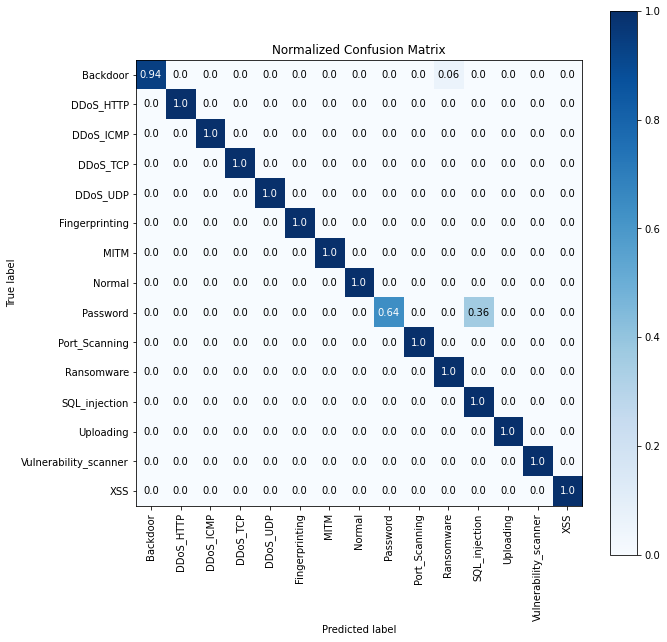

                       precision    recall  f1-score   support

             Backdoor     1.0000    0.9412    0.9697        17
            DDoS_HTTP     1.0000    1.0000    1.0000        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     1.0000    1.0000    1.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     1.0000    0.6429    0.7826        42
        Port_Scanning     1.0000    1.0000    1.0000        20
           Ransomware     0.8750    1.0000    0.9333         7
        SQL_injection     0.7222    1.0000    0.8387        39
            Uploading     1.0000    1.0000    1.0000        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     1.0000    1.0000    1.0000  

In [46]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('Efficient Net B7 Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**8. Predictions using EfficientnetV2L**

In [47]:
%%time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255 #Read all the images from test set
     
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    efficientnetv2l_model_prediction=efficientnetv2l_model.predict(this_img) #Input image processing using trained master model
    #Results generation by EfficientNetV2L
    prob=efficientnetv2l_model_prediction[0,np.argmax(efficientnetv2l_model_prediction,axis=1)[0]]
    res=label[np.argmax(efficientnetv2l_model_prediction,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 50ms/step
CPU times: user 2min 18s, sys: 2.78 s, total: 2min 21s
Wall time: 2min 38s


Efficient NetV2L Accuracy: 0.9992548435171386
Precision: 0.9992734724292102
Recall: 0.9992548435171386
F1 Score: 0.9992550708029347
Cohen Kappa Score: 0.9985075606178387


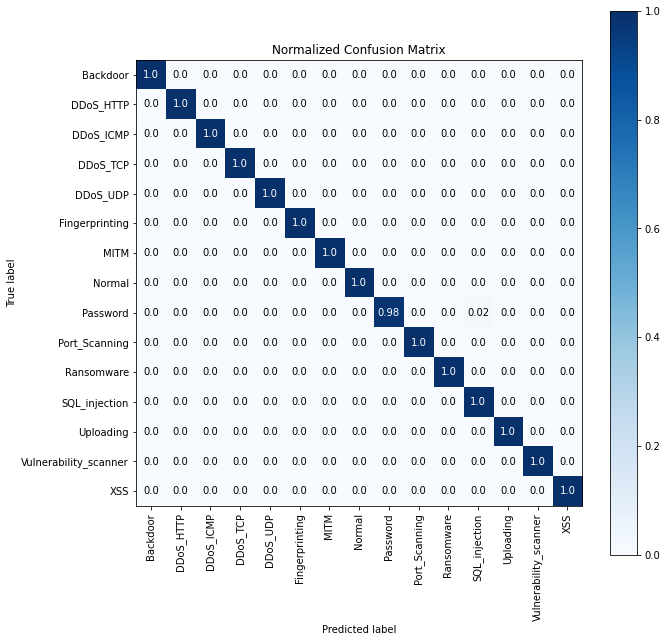

                       precision    recall  f1-score   support

             Backdoor     1.0000    1.0000    1.0000        17
            DDoS_HTTP     1.0000    1.0000    1.0000        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     1.0000    1.0000    1.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     1.0000    0.9762    0.9880        42
        Port_Scanning     1.0000    1.0000    1.0000        20
           Ransomware     1.0000    1.0000    1.0000         7
        SQL_injection     0.9750    1.0000    0.9873        39
            Uploading     1.0000    1.0000    1.0000        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     1.0000    1.0000    1.0000  

In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('Efficient NetV2L Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))

**Bootstrap Aggregation Ensembles**

In [56]:
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range((length//127)+1):
    input_img=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in input_img:
        this_img=np.array(Image.open(path))/255
        test_batch.append(this_img)
    #Results generation by Generic CNN
    cnn_model_prediction=cnn_model.predict(np.array(test_batch))
    cnn_model_prediction=list(np.argmax(cnn_model_prediction,axis=1))
    cnn_model_prediction=[label[con] for con in cnn_model_prediction]
    #Results generation by VGG19
    vgg19_model_prediction=vgg19_model.predict(np.array(test_batch))
    vgg19_model_prediction=list(np.argmax(vgg19_model_prediction,axis=1))
    vgg19_model_prediction=[label[con] for con in vgg19_model_prediction]
    #Results generation by Inception
    incep_model_prediction=incep_model.predict(np.array(test_batch))
    incep_model_prediction=list(np.argmax(incep_model_prediction,axis=1))
    incep_model_prediction=[label[con] for con in incep_model_prediction]
    #Results generation by InceptionResnetV2
    incepresnetv2_model_prediction=incepresnetv2_model.predict(np.array(test_batch))
    incepresnetv2_model_prediction=list(np.argmax(incepresnetv2_model_prediction,axis=1))
    incepresnetv2_model_prediction=[label[con] for con in incepresnetv2_model_prediction]
    #Results generation by EfficientNetV2L
    efficientnetv2l_model_prediction=efficientnetv2l_model.predict(np.array(test_batch))
    efficientnetv2l_model_prediction=list(np.argmax(efficientnetv2l_model_prediction,axis=1))
    efficientnetv2l_model_prediction=[label[con] for con in efficientnetv2l_model_prediction]
    
    #Results integration of Five best-performing models
    predict_batch=[]
    for i,j,k,p,q in zip(cnn_model_prediction, vgg19_model_prediction,incep_model_prediction,incepresnetv2_model_prediction,efficientnetv2l_model_prediction,):
        count=defaultdict(int)
        count[i]+=1
        count[j]+=1
        count[k]+=1
        count[p]+=1
        count[q]+=1
        #Arrang the predicted results in descending order
        predict_one=sorted(count.items(), key=operator.itemgetter(1),reverse=True)[0][0]
        predict_batch.append(predict_one)
    predict.append(predict_batch)
t2 = time.time()
print('The Testing Time is :%f seconds' % (t2-t1))

3/3 [==============================] - 1s 303ms/step
The Testing Time is :57.667489 seconds


In [57]:
predict=sum(predict,[])

Ensemble Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Cohen Kappa Score: 1.0


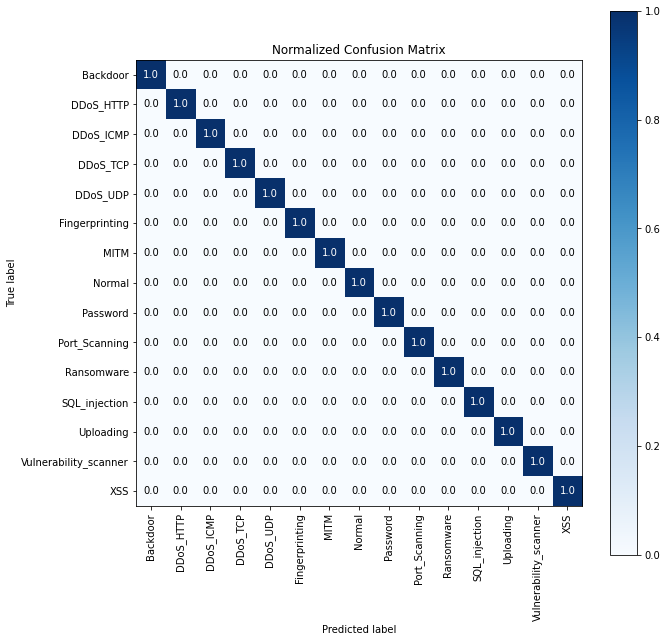

                       precision    recall  f1-score   support

             Backdoor     1.0000    1.0000    1.0000        17
            DDoS_HTTP     1.0000    1.0000    1.0000        33
            DDoS_ICMP     1.0000    1.0000    1.0000        40
             DDoS_TCP     1.0000    1.0000    1.0000        24
             DDoS_UDP     1.0000    1.0000    1.0000        91
       Fingerprinting     1.0000    1.0000    1.0000         7
                 MITM     1.0000    1.0000    1.0000         3
               Normal     1.0000    1.0000    1.0000       940
             Password     1.0000    1.0000    1.0000        42
        Port_Scanning     1.0000    1.0000    1.0000        20
           Ransomware     1.0000    1.0000    1.0000         7
        SQL_injection     1.0000    1.0000    1.0000        39
            Uploading     1.0000    1.0000    1.0000        29
Vulnerability_scanner     1.0000    1.0000    1.0000        40
                  XSS     1.0000    1.0000    1.0000  

In [58]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
acc=accuracy_score(true,predict)
pre=precision_score(true,predict,average='weighted')
re=recall_score(true,predict,average='weighted')
f1=f1_score(true,predict,average='weighted')
cks=cohen_kappa_score(true,predict)
print('Ensemble Accuracy: %s'%acc)
print('Precision: %s'%pre)
print('Recall: %s'%re)
print('F1 Score: %s'%f1)
print('Cohen Kappa Score: %s'%cks)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['Backdoor','DDoS_HTTP','DDoS_ICMP','DDoS_TCP','DDoS_UDP','Fingerprinting','MITM', 'Normal','Password','Port_Scanning','Ransomware','SQL_injection','Uploading','Vulnerability_scanner','XSS']
skplt.metrics.plot_confusion_matrix(true, predict, normalize=True, x_tick_rotation=90,figsize=(10,10),cmap='Blues' )
plt.show()
print(classification_report(true, predict, target_names=target_names,digits=4))